In [1]:
import seaborn as sns

sns.set()
sns.set_style("dark")

# Disasters

In [2]:
import pandas as pd

df = pd.read_csv("data/disasters.csv")
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,Zambia,ZM,ZMB,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0
966,967,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
967,968,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
968,969,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0


In [3]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

In [4]:
df["Disaster"] = df["Indicator"].apply(lambda x: x.split(":")[-1].strip())

flood_df = df[df["Disaster"] == "Flood"]

flood_counts_by_country = flood_df.loc[:, "1980": "2022"].mean(axis=1)
flood_df["Total Floods"] = flood_counts_by_country

total_floods_by_country = flood_df.groupby("Country")["Total Floods"].mean()

print(total_floods_by_country)

Country
Afghanistan, Islamic Rep. of    3.233333
Albania                         1.230769
Algeria                         1.760000
American Samoa                  1.000000
Angola                          2.142857
                                  ...   
Vietnam                         2.800000
West Bank and Gaza              1.000000
Yemen, Rep. of                  1.950000
Zambia                          1.294118
Zimbabwe                        1.181818
Name: Total Floods, Length: 182, dtype: float64


/var/folders/c5/vrz4ctk96lsf9fy43ph01j700000gn/T/ipykernel_63848/1753874763.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_df["Total Floods"] = flood_counts_by_country


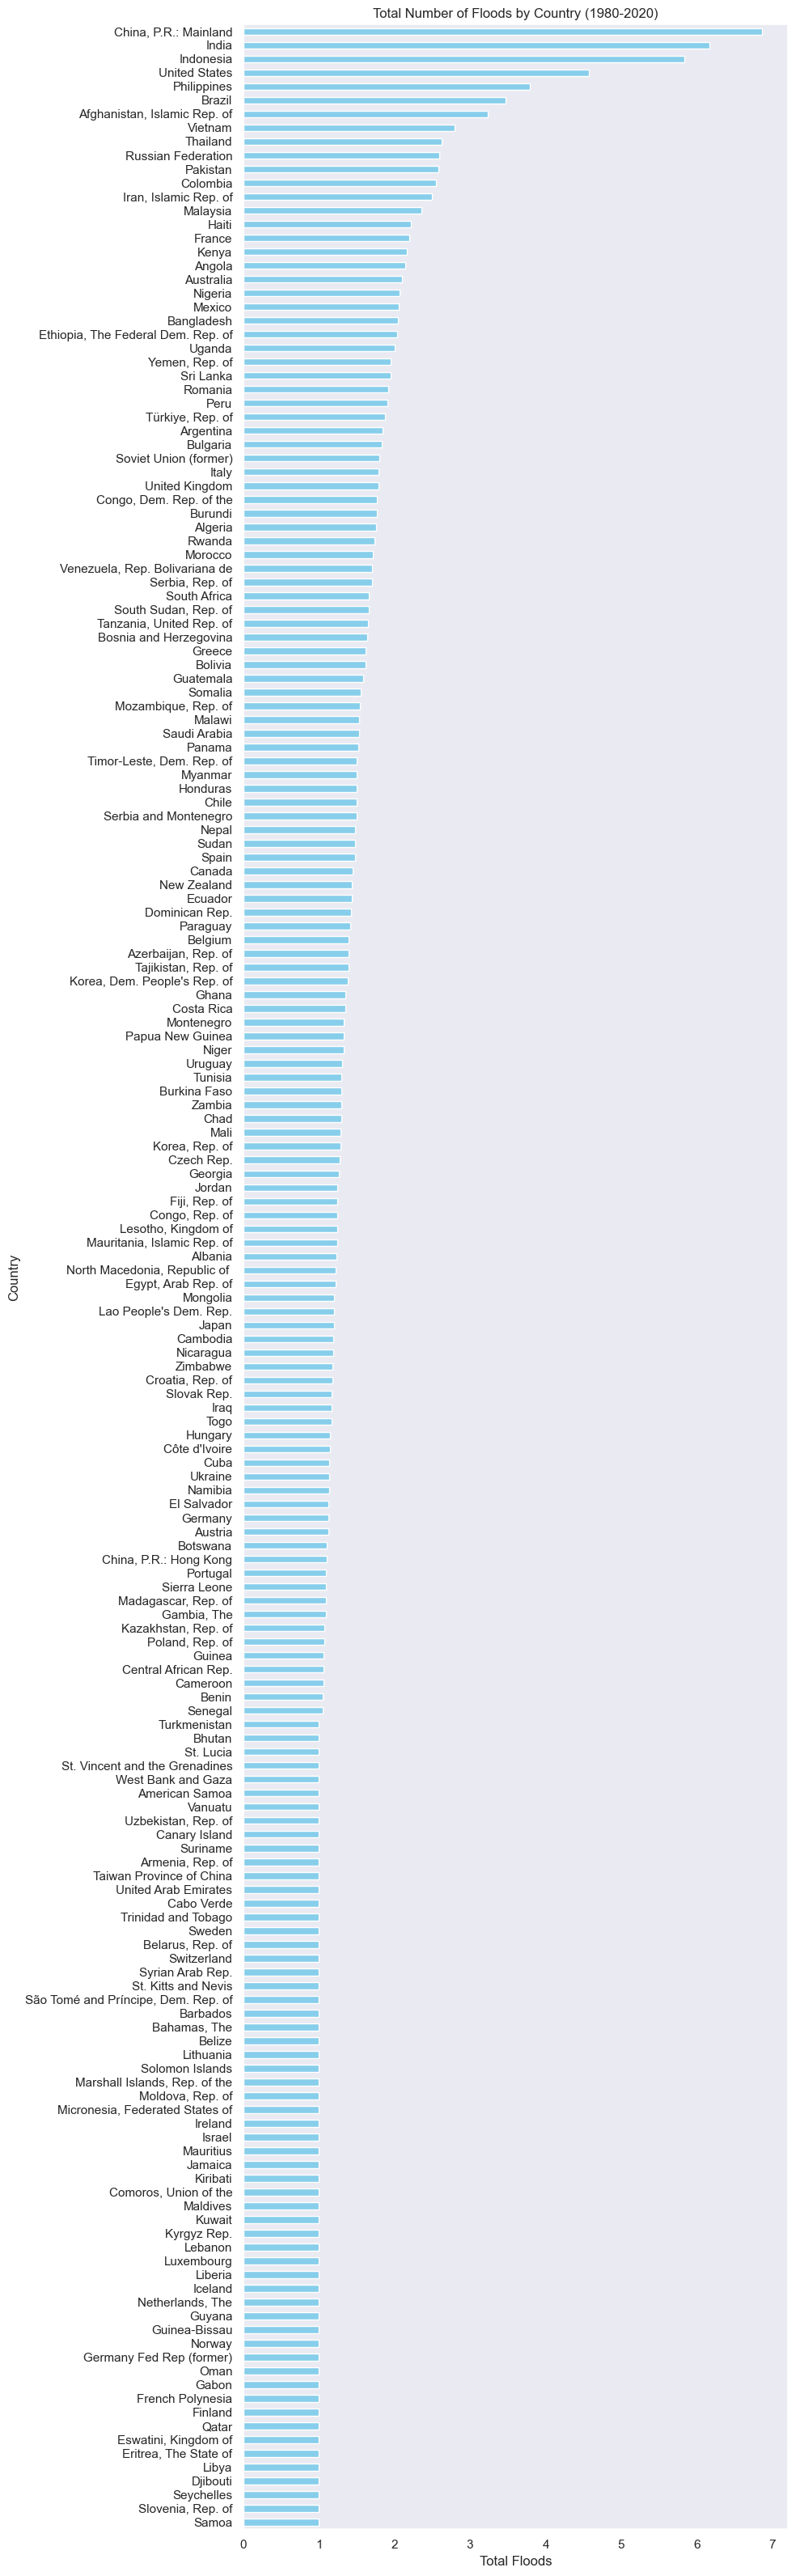

In [5]:
import matplotlib.pyplot as plt

total_floods_by_country_sorted = total_floods_by_country.sort_values()

plt.figure(figsize=(10, 32))
total_floods_by_country_sorted.plot(kind="barh", color="skyblue")
plt.title("Total Number of Floods by Country (1980-2020)")
plt.xlabel("Total Floods")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Surface Temp

In [6]:
import pandas as pd

df = pd.read_csv("data/surface_temp.csv")
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

In [7]:
change_by_country = df.loc[:, "F1961": "F2022"].mean(axis=1)
df["Total Change"] = change_by_country

df = df.groupby("Country")["Total Change"].sum()

print(change_by_country)

0      0.484661
1      0.471387
2      0.724871
3      0.476288
4      0.792806
         ...   
220    0.805548
221    0.570774
222    0.141613
223    0.403823
224    0.203677
Length: 225, dtype: float64


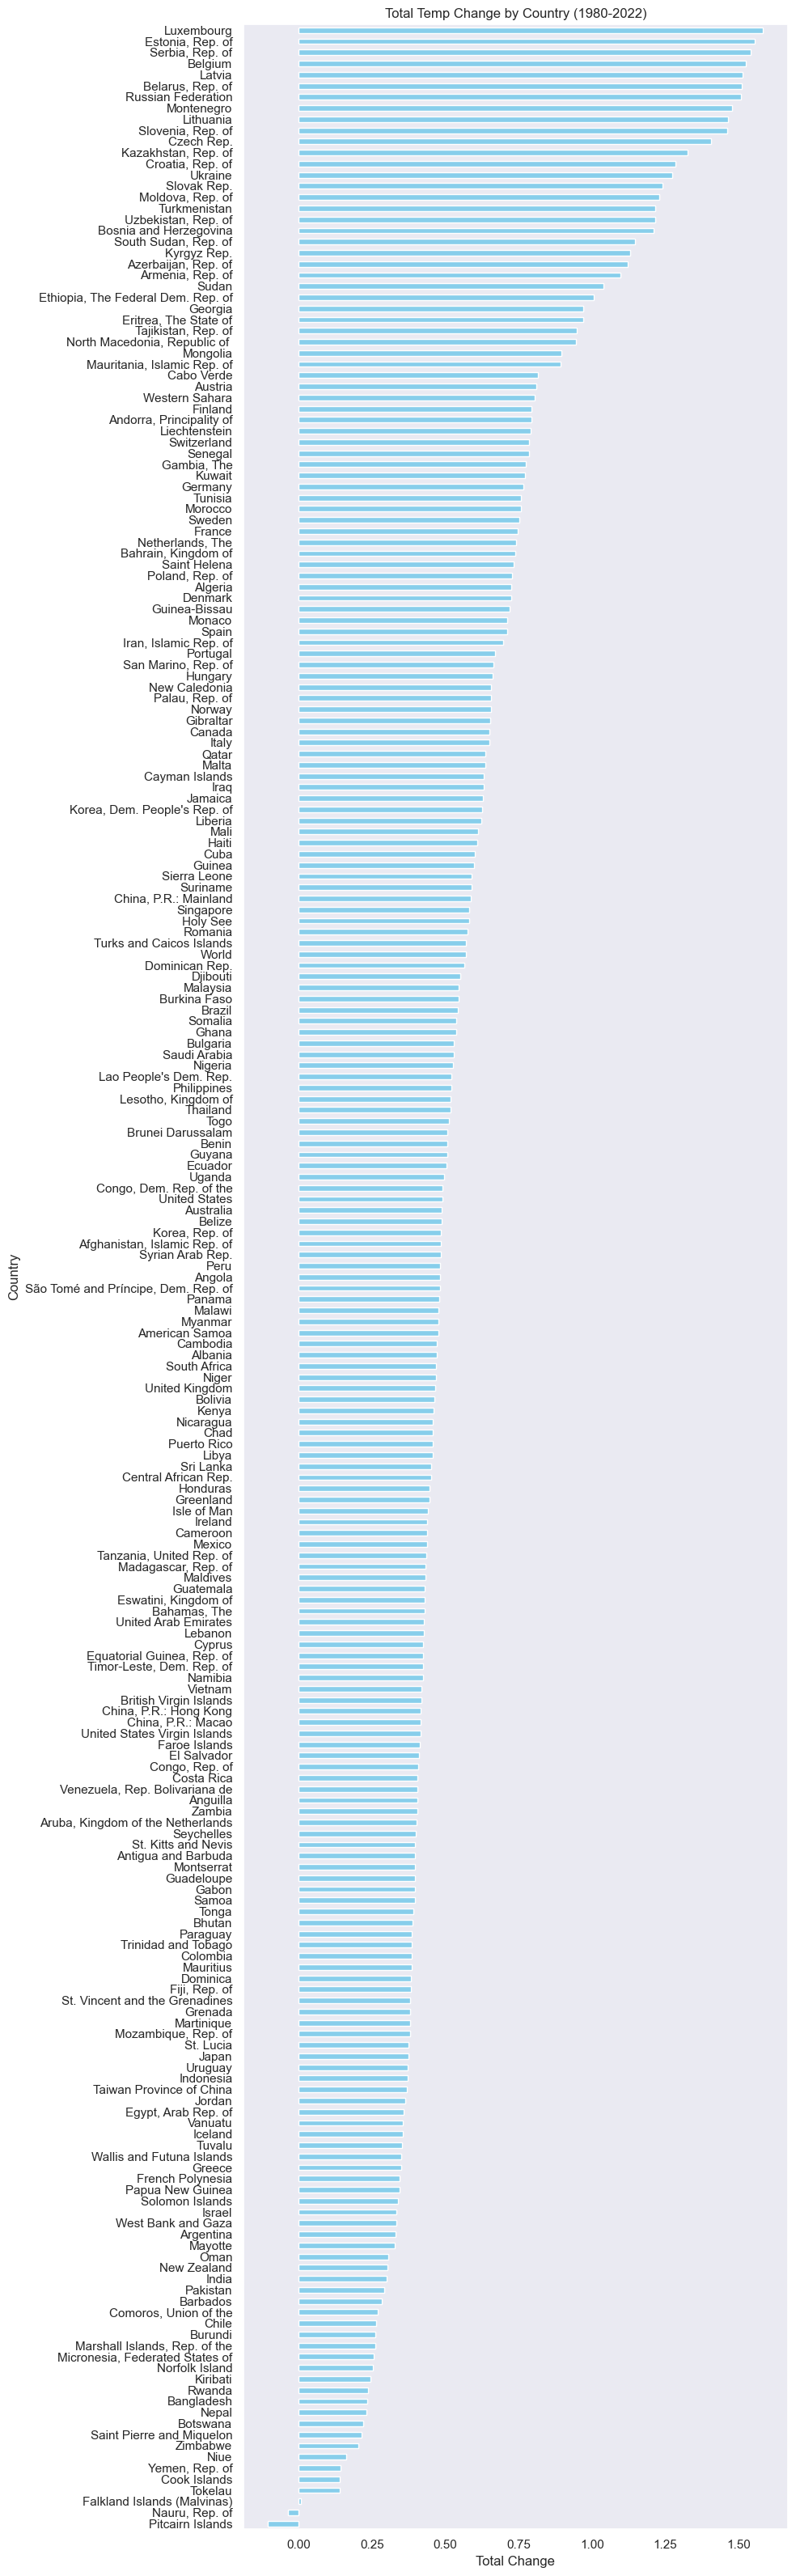

In [8]:
import matplotlib.pyplot as plt

df = df.sort_values()

plt.figure(figsize=(10, 32))
df.plot(kind="barh", color="skyblue")
plt.title("Total Temp Change by Country (1980-2022)")
plt.xlabel("Total Change")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Together

In [9]:
disasters_df = pd.read_csv("./data/disasters.csv")
disasters_df["Disaster"] = disasters_df["Indicator"].apply(lambda x: x.split(":")[-1].strip())
surface_temp_df = pd.read_csv("./data/surface_temp.csv")

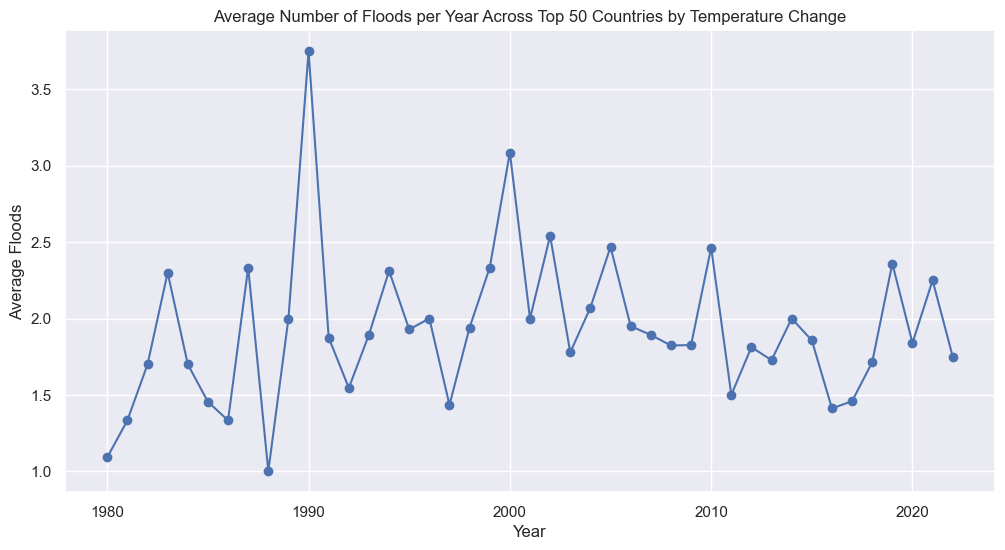

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the mean temperature change for each country
surface_temp_df["mean_temp_change"] = surface_temp_df.loc[:, "F1980":"F2022"].mean(axis=1)

# Get the top 50 countries with the greatest mean temperature change
top_countries = surface_temp_df.sort_values(by="mean_temp_change", ascending=False).head(50)["Country"]

# Filter the disasters dataframe for floods in these top 50 countries
floods_df = disasters_df[(
    disasters_df["Disaster"] == "TOTAL") &
    (disasters_df["Country"].isin(top_countries))
]

# Extract years from columns and melt the dataframe to have a long format
years = [str(year) for year in range(1980, 2023)]
floods_df_long = floods_df.melt(id_vars=["Country", "Disaster"], value_vars=years,
                                var_name="Year", value_name="Flood Count")

# Convert year from string to integer
floods_df_long["Year"] = floods_df_long["Year"].apply(lambda x: int(x.split("_")[0]))

# Group by year and calculate the average number of floods across the top 50 countries
yearly_avg_floods = floods_df_long.groupby("Year")["Flood Count"].mean().reset_index()

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_floods["Year"], yearly_avg_floods["Flood Count"], marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average Floods")
plt.title("Average Number of Floods per Year Across Top 50 Countries by Temperature Change")
plt.grid(True)
plt.show()

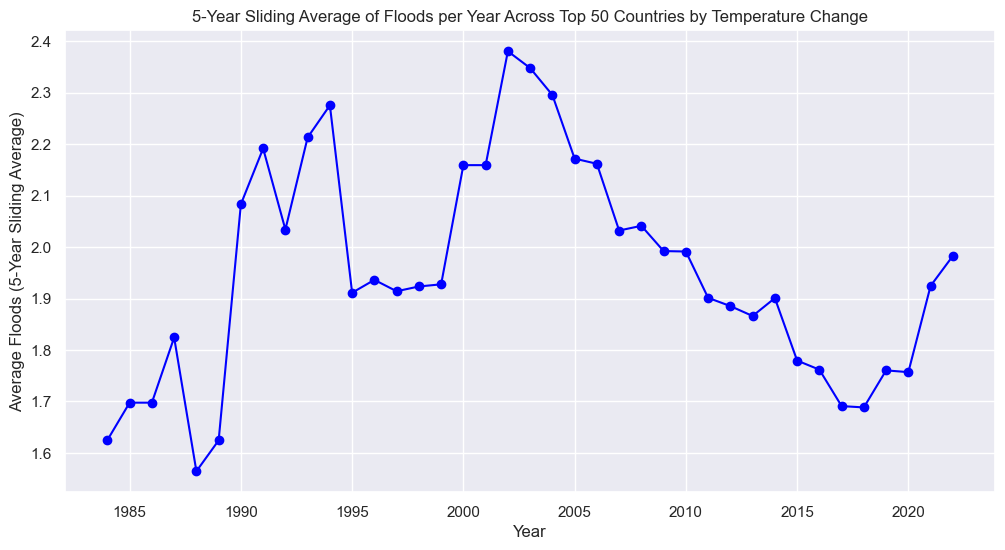

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the rest of the code is unchanged and you"ve calculated yearly_avg_floods as before

# Calculate a 5-year sliding window average of the floods
yearly_avg_floods["5yr_Sliding_Avg"] = yearly_avg_floods["Flood Count"].rolling(window=5).mean()

# Plotting the time series with the sliding window average
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_floods["Year"], yearly_avg_floods["5yr_Sliding_Avg"], marker="o", linestyle="-", color="blue")
plt.xlabel("Year")
plt.ylabel("Average Floods (5-Year Sliding Average)")
plt.title("5-Year Sliding Average of Floods per Year Across Top 50 Countries by Temperature Change")
plt.grid(True)
plt.show()

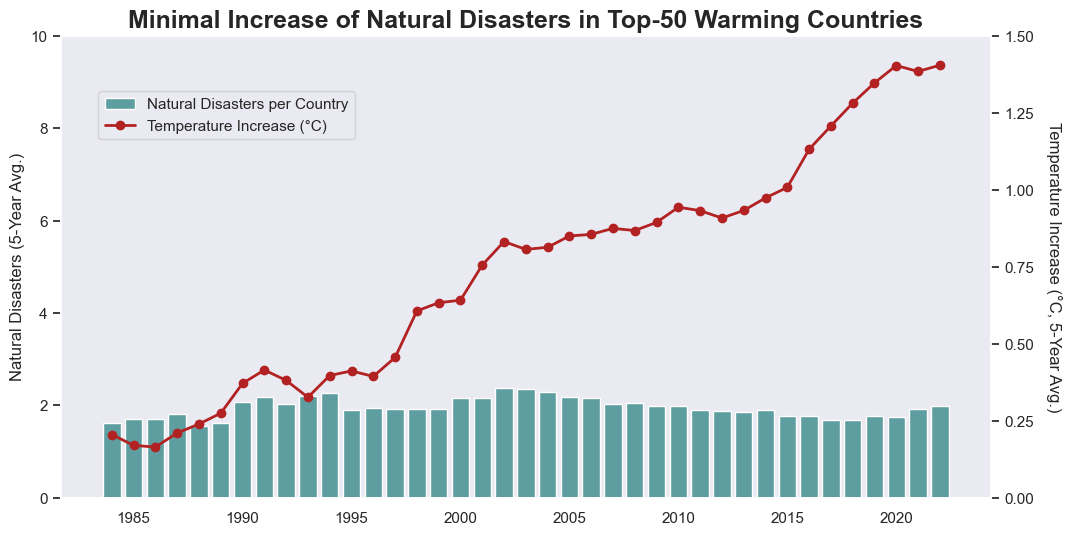

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have yearly_avg_floods prepared with the 5-year sliding average of floods
# And surface_temp_df ready for calculating the yearly temperature change

# Calculate the yearly average temperature change globally
years_temp = surface_temp_df.loc[:, 'F1980':'F2022']
global_yearly_avg_temp_change = years_temp.mean().reset_index()
global_yearly_avg_temp_change.columns = ['Year', 'Avg_Temp_Change']
global_yearly_avg_temp_change['Year'] = global_yearly_avg_temp_change['Year'].apply(lambda x: int(x[1:].split('_')[0]))
global_yearly_avg_temp_change['5yr_Sliding_Avg_Temp'] = global_yearly_avg_temp_change['Avg_Temp_Change'].rolling(window=5).mean()

# Plotting both time series on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'cadetblue'
ax1.set_ylabel('Natural Disasters (5-Year Avg.)')
ax1.bar(
    yearly_avg_floods['Year'],
    yearly_avg_floods['5yr_Sliding_Avg'],
    color=color,
    label='Natural Disasters per Country',
)
ax1.tick_params(axis='y')
ax1.set_yticks(np.arange(0, 10.01, 2)) 

ax2 = ax1.twinx()
color = 'firebrick'
ax2.set_ylabel('Temperature Increase (°C, 5-Year Avg.)', labelpad=20)
ax2.plot(
    global_yearly_avg_temp_change['Year'],
    global_yearly_avg_temp_change['5yr_Sliding_Avg_Temp'],
    color=color,
    label='Temperature Increase (°C)',
    lw=2,
    marker="o",
)
ax2.tick_params(axis='y')
ax2.set_yticks(np.arange(0, 1.51, .25))
ax2.yaxis.label.set_rotation(270)

# fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.8))
plt.title('Minimal Increase of Natural Disasters in Top-50 Warming Countries', fontsize=18, fontname="Arial", fontweight="bold")
plt.show()

fig.savefig("figures/deceptive.png")

In [13]:
import pandas as pd

sea_levels_df = pd.read_csv("data/sea_levels.csv")
sea_levels_df = sea_levels_df.drop(columns=["ObjectId", "Country", "ISO2", "ISO3", "Unit", "CTS Code", "CTS Name", "CTS Full Descriptor"])
sea_levels_df

,Indicator,Source,Measure,Date,Value
0,Change in mean sea level: Sea level: TOPEX.Pos...,National Oceanic and Atmospheric Administratio...,Sea Okhotsk,D12/16/1992,10.11
1,Change in mean sea level: Sea level: TOPEX.Pos...,National Oceanic and Atmospheric Administratio...,Adriatic Sea,D12/17/1992,32.73
2,Change in mean sea level: Sea level: TOPEX.Pos...,National Oceanic and Atmospheric Administratio...,Andaman Sea,D12/17/1992,-14.88
3,Change in mean sea level: Sea level: TOPEX.Pos...,National Oceanic and Atmospheric Administratio...,Arabian Sea,D12/17/1992,-9.76
4,Change in mean sea level: Sea level: TOPEX.Pos...,National Oceanic and Atmospheric Administratio...,Atlantic Ocean,D12/17/1992,-13.66
...,...,...,...,...,...
39602,Change in mean sea level: Sea level: Trend,National Oceanic and Atmospheric Administratio...,South China,D02/25/2024,4.02
39603,Change in mean sea level: Sea level: Trend,National Oceanic and Atmospheric Administratio...,Southern Ocean,D02/25/2024,3.11
39604,Change in mean sea level: Sea level: Trend,National Oceanic and Atmospheric Administratio...,Tropics,D02/25/2024,3.20
39605,Change in mean sea level: Sea level: Trend,National Oceanic and Atmospheric Administratio...,World,D02/25/2024,3.14


In [14]:
sorted(set(sea_levels_df["Date"].values), key=lambda x: int(x.split("/")[-1]))

['D12/27/1992',
 'D12/28/1992',
 'D12/17/1992',
 'D12/18/1992',
 'D12/26/1992',
 'D12/16/1992',
 'D12/20/1993',
 'D03/18/1993',
 'D12/29/1993',
 'D02/06/1993',
 'D07/14/1993',
 'D05/26/1993',
 'D09/11/1993',
 'D11/29/1993',
 'D03/27/1993',
 'D02/23/1993',
 'D06/22/1993',
 'D09/19/1993',
 'D05/16/1993',
 'D08/02/1993',
 'D06/23/1993',
 'D05/14/1993',
 'D08/22/1993',
 'D01/14/1993',
 'D10/01/1993',
 'D02/14/1993',
 'D02/25/1993',
 'D09/30/1993',
 'D06/03/1993',
 'D10/11/1993',
 'D08/21/1993',
 'D05/05/1993',
 'D02/15/1993',
 'D12/28/1993',
 'D06/04/1993',
 'D10/20/1993',
 'D06/24/1993',
 'D01/05/1993',
 'D09/10/1993',
 'D12/09/1993',
 'D01/16/1993',
 'D01/07/1993',
 'D04/24/1993',
 'D05/25/1993',
 'D08/11/1993',
 'D09/01/1993',
 'D01/06/1993',
 'D08/12/1993',
 'D12/08/1993',
 'D11/18/1993',
 'D04/14/1993',
 'D10/21/1993',
 'D01/15/1993',
 'D02/04/1993',
 'D01/04/1993',
 'D08/03/1993',
 'D07/12/1993',
 'D12/19/1993',
 'D10/10/1993',
 'D03/08/1993',
 'D06/13/1993',
 'D07/13/1993',
 'D09/21

In [15]:
set(sea_levels_df["Indicator"].values)

{'Change in mean sea level: Sea level: Jason.1',
 'Change in mean sea level: Sea level: Jason.2',
 'Change in mean sea level: Sea level: Jason.3',
 'Change in mean sea level: Sea level: Sentinel-6MF',
 'Change in mean sea level: Sea level: TOPEX.Poseidon',
 'Change in mean sea level: Sea level: Trend'}

In [16]:
disasters_df = pd.read_csv("./data/disasters.csv")
disasters_df["Disaster Type"] = disasters_df["Indicator"].apply(lambda x: x.split(":")[-1].strip())
disasters_df = disasters_df.drop(columns=["ObjectId", "ISO2", "ISO3", "Indicator", "Unit", "Source", "CTS Code", "CTS Name", "CTS Full Descriptor"])
disasters_df = disasters_df.melt(id_vars=["Country", "Disaster Type"], var_name="Year", value_name="Count")
disasters_df

,Country,Disaster Type,Year,Count
0,"Afghanistan, Islamic Rep. of",Drought,1980,NaN
1,"Afghanistan, Islamic Rep. of",Extreme temperature,1980,NaN
2,"Afghanistan, Islamic Rep. of",Flood,1980,1.0
3,"Afghanistan, Islamic Rep. of",Landslide,1980,NaN
4,"Afghanistan, Islamic Rep. of",Storm,1980,NaN
...,...,...,...,...
41705,Zambia,TOTAL,2022,1.0
41706,Zimbabwe,Drought,2022,NaN
41707,Zimbabwe,Flood,2022,1.0
41708,Zimbabwe,Storm,2022,1.0


In [17]:
set(disasters_df["Country"].values)

{'Afghanistan, Islamic Rep. of',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia, Rep. of',
 'Australia',
 'Austria',
 'Azerbaijan, Rep. of',
 'Azores Island',
 'Bahamas, The',
 'Bangladesh',
 'Barbados',
 'Belarus, Rep. of',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canary Island',
 'Cayman Islands',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China, P.R.: Hong Kong',
 'China, P.R.: Macao',
 'China, P.R.: Mainland',
 'Colombia',
 'Comoros, Union of the',
 'Congo, Dem. Rep. of the',
 'Congo, Rep. of',
 'Cook Islands',
 'Costa Rica',
 'Croatia, Rep. of',
 'Cuba',
 'Cyprus',
 'Czech Rep.',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Rep.',
 'Ecuador',
 'Egypt, Arab Rep. of',
 'E

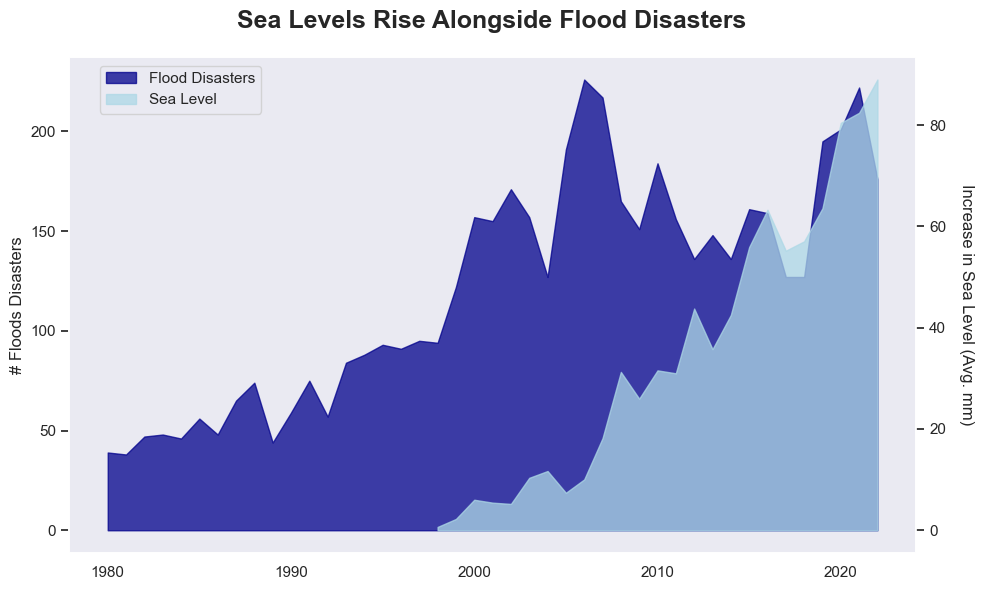

In [74]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

floods_df = disasters_df[disasters_df["Disaster Type"] == "Flood"]

# Group by year and summing the flood counts
yearly_flood_counts = floods_df.groupby("Year")["Count"].sum().reset_index()
yearly_flood_counts["Year"] = yearly_flood_counts["Year"].str.replace("_count", "").astype(int)
# yearly_flood_counts = yearly_flood_counts.query("Year >= 1992")

sea_levels_df["Year"] = pd.to_datetime(sea_levels_df["Date"].str[1:]).dt.year
sea_levels_df = sea_levels_df.query("Year >= 1998 and Year <= 2022")

yearly_sea_level_changes = sea_levels_df.groupby("Year")["Value"].mean()#.cumsum()

# Create the plots.
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot version
# ax1.bar(yearly_flood_counts["Year"], yearly_flood_counts["Count"], color="b", label="Floods Count")

# Area plot version
yearly_flood_counts = yearly_flood_counts.groupby("Year")["Count"].mean()
ax1.fill_between(
    yearly_flood_counts.index,
    0,
    yearly_flood_counts.values,
    color="darkblue",
    alpha=0.75,
    label="Flood Disasters",
)
# ax1.set_xlabel("Year")
ax1.set_ylabel("# Floods Disasters")
ax1.tick_params(axis="y")

# Twin axis for sea level changes
ax2 = ax1.twinx()
ax2.fill_between(
    yearly_sea_level_changes.index,
    0,
    yearly_sea_level_changes.values,
    color="lightblue",
    alpha=0.75,
    label="Sea Level",
)
ax2.set_ylabel("Increase in Sea Level (Avg. mm)", labelpad=20)
ax2.tick_params(axis="y")
ax2.yaxis.label.set_rotation(270)

# Title and legend
fig.suptitle("Sea Levels Rise Alongside Flood Disasters", fontsize=18, fontname="Arial", fontweight="bold")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()

fig.savefig("figures/persuasive.png")